#  <center> <font style="color:rgb(100,109,254)">Hough Transforms  </font> </center>


## <font style="color:rgb(134,19,348)">  What are Hough Transforms </font>
Hough transforms is a popular feature extraction technique in image processing and computer vision. It is used to detect simple shapes like lines, circle etc (A simple shape is one which can be represented by only a few params). The classical Hough transform was mostly concerned with the identification of lines in the image, but now its widely used for identifying positions of arbitrary shapes, most commonly circles or ellipses. The Hough transform was invented by **Richard Duda** and **Peter Hart** in **1972**, who called it a **"generalized Hough transform"**.

We will be using hough transforms to detect lines and circles, One of the main advantage of using hough transforms is that its Occlusion invariant to some extent.

##  <font style="color:rgb(134,19,348)"> Hough Transforms Theory:  </font>
Now hough transforms helps you find parametric models, these are models which are completely described by some fix parameters e.g consider a line which is represented by **y = mx + b**, to define any line you would need to find its `m` and `b` (2 params). Similarly a circle is described by 3 parameters i.e. center (x,y) coordinates and a `r` radius. So any other shapes which a are  defined by a few parameters can be found by hough transforms, I'm going to explain the hough transforms considering we are going to detect lines with it but as you can see the same theory can be extended to other simple shapes. 

There is one problem, the slope `m` can go anywhere from  $-\infty$ to  $+\infty$ and since we are going to be estimating this parameter, its much easier if we bound it to a range, which is why we are going to work with the line in its polar form: 
$$\rho = xcos\theta + ysin\theta$$ 

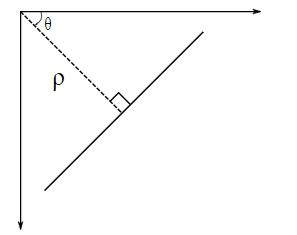

So now we are going to find $\theta$ and $\rho$, where ρ is the perpendicular distance from the origin to the line, and θ is the angle formed by this perpendicular line and the horizontal axis measured in counter-clockwise (This direction depends on how you represent the coordinate system. This representation is used in OpenCV). 


## <font style="color:rgb(134,19,348)"> The Accumulator Array:  </font>

Now Any line can be represented in these two terms, (ρ,θ). So now lets create a 2D array or an accumulator this will correspond to  all the possible values of `ρ` and `θ`, its set 0 initially. This array will hold evidence for each possible line, this evidence is collected via a voting system which ill explain later, for now let all the rows of this array denote the `ρ` and columns denote the `θ`. The size of this array determines how precise you want the results to be, and a higher resolution image (which can have more possible line variations) will requires a larger array, So if you wanted the accuracy of angles to be 1 degree, you will need 180 columns. For ρ, the maximum distance possible is the diagonal length of the image. So considering you want one pixel accuracy, the number of rows can be the diagonal length of the image, but for now lets assume the size of our accumulator is 10x10, meaning for a single image a line can have 10 bins so 10 possible $\theta$ and $\rho$, values and in other words it total 10x10 = 100 bins so 100 possible lines can exist in this image.

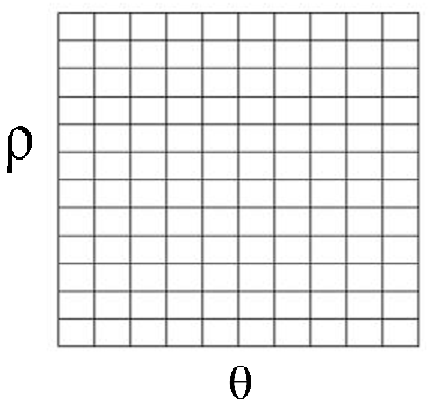

## <font style="color:rgb(134,19,348)">  Edge Detection & Edge Pixels Voting: </font>
Now after setting up the accumulator, we are ready to collect evidence for each bin (each cell in the array) if that line exist or not. *Remember each bin represents a possible line*, the best way to get evidence is to get the edges information by performing edge detection, because if there are line in the image, then it would have edges.

So remember the output of the edge detection is an array of x,y values (edge pixels) [(x1, y1), (x2, y2), (x3,y3), ... (xn, yn)]. 
Now for each pair of x,y we will plug in $\theta$ possible values ($\theta$ values corresponding to each bin, lets say for maximum accuracy we will plug in values from 0 to 180 degrees.) in the above polar equation of line, And with that we will obtain possible values of $\rho$. 

So for each x,y there are multiple possible lines passing through them,
Example: Plotting all of these lines for a single coordinate say, x1=8 and y1=6, Gives following results:

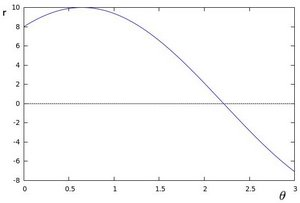

Now lets take 3 edge pixels, (x1,y1), (x2,y2), (x3,y3) and plot their curves.
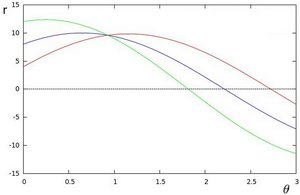

If the curves of two different points intersect in the plane then that means that both points belong to a same line, so here you're seeing the three plots intersect in one single point (0.925,9.6), these coordinates are the parameters ( $\theta$ and $\rho$) or the line in which (x1,y1), (x2,y2) and (x3,y3) lay.

**Note: The following image is not entirely accurate as each edge pixel will vote for multiple possible bins but this gives this gives a good Idea what's happening.**

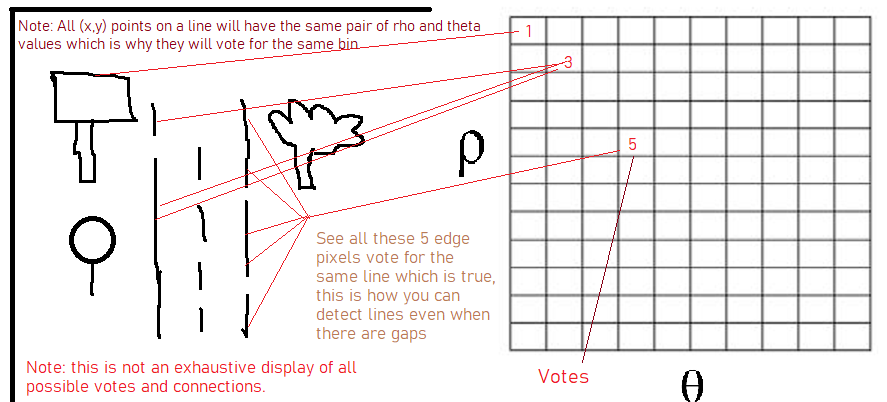

**Now after the voting is done we can simply select the bins (possible lines) which have number of votes greater than some threshold and use only those $\theta$ and $\rho$ to draw the lines.**


